## Numerical Methods - Wave Equation

Methods for solving the wave equation via the advection equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22,'lines.linewidth': 2})
# plt.rcParams.keys()

In [2]:
# Solvers for u_t + a u_x = 0 
# - periodic boundary conditions 
# - nu = ak/h
def Lax_Friedrichs(U0,nu,Nsteps):
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    c1 = (1+nu)/2 #Uj-1 const
    c2 = (1-nu)/2
    for n in range(Nsteps):
        # Uj-1 -> np.roll(Uj,1)
        U[:,n+1] = c1*np.roll(U[:,n],1) + c2*np.roll(U[:,n],-1)
    return U

def Lax_Wendroff(U0,nu,Nsteps):
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    c0 = 1-nu**2      #Uj const
    cp = (nu**2-nu)/2 #Uj+1 const
    cm = (nu**2+nu)/2 #Uj-1 const
    for n in range(Nsteps):
        # Uj-1 -> np.roll(Uj,1)
        U[:,n+1] = c0*U[:,n] + cm*np.roll(U[:,n],1) + cp*np.roll(U[:,n],-1)
    return U

def upwind_left(U0,nu,Nsteps):
    # approx derivative with Uj and Uj-1
    # use nu positive
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    c0 = 1-nu
    for n in range(Nsteps):
        # Uj-1 -> np.roll(Uj,1)
        U[:,n+1] = c0*U[:,n] + nu*np.roll(U[:,n],1)
    return U

def upwind_right(U0,nu,Nsteps):
    # approx derivative with Uj and Uj+1
    # use nu negative
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    c0 = 1+nu
    for n in range(Nsteps):
        # Uj-1 -> np.roll(Uj,1)
        U[:,n+1] = c0*U[:,n] - nu*np.roll(U[:,n],-1)
    return U

def beam_left(U0,nu,Nsteps):
    # approx derivative with Uj and Uj-1 and Uj-2
    # use nu positive
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    c0 = 1-3*nu/2+nu**2/2
    c1 = 2*nu-nu**2
    c2 = -nu/2+nu**2/2
    for n in range(Nsteps):
        # Uj-1 -> np.roll(Uj,1)
        U[:,n+1] = c0*U[:,n] + c1*np.roll(U[:,n],1) + c2*np.roll(U[:,n],2)
    return U

def beam_right(U0,nu,Nsteps):
    # approx derivative with Uj and Uj-1 and Uj-2
    # use nu positive
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    c0 = 1+3*nu/2+nu**2/2
    c1 = -2*nu-nu**2
    c2 = nu/2+nu**2/2
    for n in range(Nsteps):
        # Uj-1 -> np.roll(Uj,1)
        U[:,n+1] = c0*U[:,n] + c1*np.roll(U[:,n],-1) + c2*np.roll(U[:,n],-2)
    return U

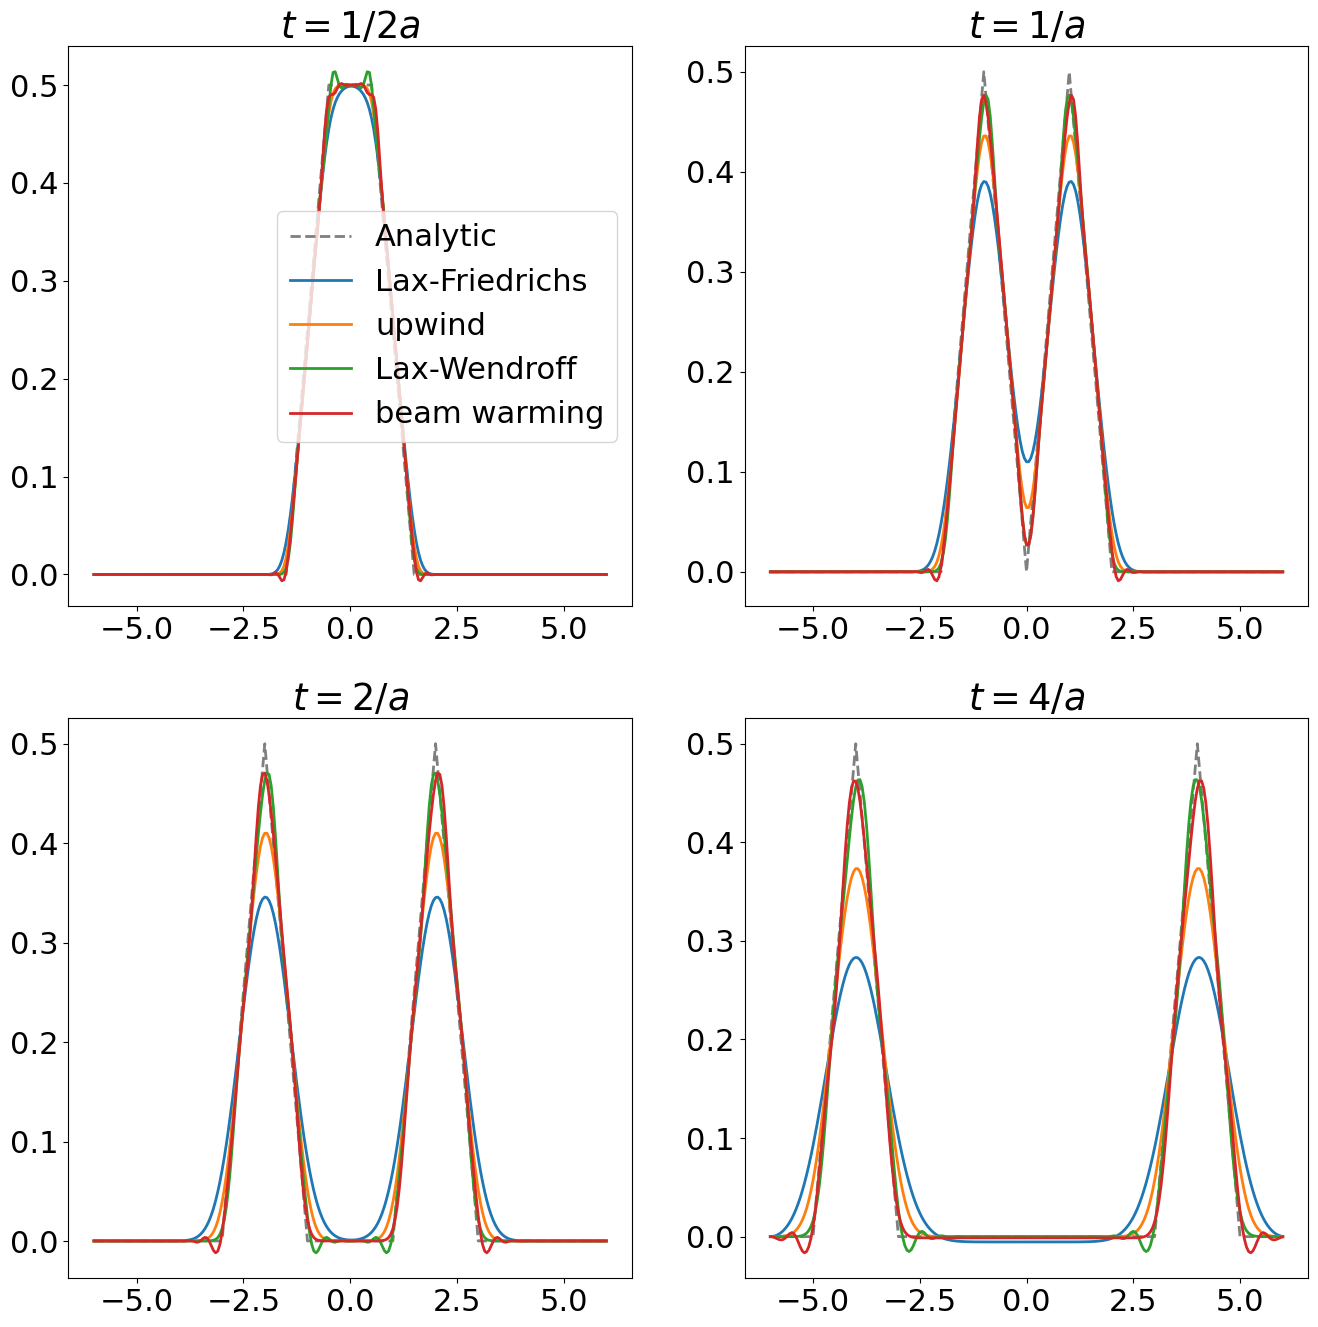

In [9]:
# input parameters
phi  = lambda x: np.maximum(1-np.abs(x),0)
dphi = lambda x: (x > -1)*(x < 0)*1 - (x > 0)*(x < 1)*1
h = 0.05
a = np.sqrt(2)
nu = 1/2
k = h*nu/a
x = np.arange(-6,6+h,h)
t = np.arange(0,4/a+k,k)
Nsteps = len(t)-1



# plot prep and analytic solution
fig,ax = plt.subplots(2,2,figsize=(16,16))
titles = [r'$t={1}/{2a}$',r'$t={1}/{a}$',r'$t={2}/{a}$',r'$t={4}/{a}$']
for (col,index) in enumerate([20,40,80,-1]):
    ax[col//2,col%2].plot(x,(phi(x-a*t[index])+phi(x+a*t[index]))/2,'C7--')
    ax[col//2,col%2].set_title(titles[col])
    
    
    
# list of methods for looping
methods = [(Lax_Friedrichs,Lax_Friedrichs),\
           (upwind_right,upwind_left),\
           (Lax_Wendroff,Lax_Wendroff),\
           (beam_right,beam_left)]



for row,(method_xi,method_eta) in enumerate(methods):

    # initialize xi and eta (row x index)
    xi  = method_xi(dphi(x)/2, -a*k/h,Nsteps)
    eta = method_eta(-dphi(x)/2,a*k/h,Nsteps)

    # solve for time derivative of x (first component of w)
    dUdt = a*(xi+eta)
    dUdx = xi-eta
    
    # integrate in x via trapezoid rule (works better than t integral)
    U = np.zeros(xi.shape)
    for i in range(len(x)-1):
        U[i+1,:] = U[i,:] + h*(dUdx[i,:]+dUdx[i+1,:])/2

    # plotting
    for col,index in enumerate([20,40,80,-1]):
        ax[col//2,col%2].plot(x,U[:,index],'C'+str(row))
    

# plt.suptitle('Main title')
ax[0,0].legend(['Analytic','Lax-Friedrichs','upwind','Lax-Wendroff', 'beam warming'])#,loc='lower right')

plt.savefig('wav_solution.pdf')